In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import numpy as np

In [11]:
# list of csv files and thier corresponding table
csv_files = [
    ('customers.csv', 'customers'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers')
]


In [ ]:
# connect to mysql database
import mysql.connector
conx = mysql.connector.connect(
    host = 'localhost',
    port = 3306,
    user = 'root',
    password = '1234567890', 
    database = 'ecommerce'
    
)
cursor = conx.cursor()

In [22]:
#folder containing mysql datafile 
folder_path = "C:/Users/SAL/Desktop/E-Commerce"
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conx.commit()



Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered

# List All Unique Cities Were Customers Are Located  

In [6]:
query = 'SELECT DISTINCT(customer_city) FROM customers'
cursor.execute(query)
data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count Number Of Orders Placed in 2017

In [8]:
query = "SELECT COUNT(order_id) FROM orders WHERE order_purchase_timestamp = 2017"
cursor.execute(query)
data = cursor.fetchall()
data[0][0]

631414

# Find the total sales per category.

In [10]:
query = '''SELECT product_category, ROUND(SUM(payment_value),2)
FROM products 
JOIN order_items 
ON products.product_id = order_items.product_id
JOIN payments 
ON payments.order_id = order_items.order_id
GROUP BY product_category;'''
cursor.execute(query)
data = cursor.fetchall()
data

[('perfumery', 1390490882.75),
 ('Furniture Decoration', 3924404019.04),
 ('telephony', 1336004347.16),
 ('bed table bath', 4699247273.21),
 ('automotive', 2338695644.61),
 ('computer accessories', 4350146744.53),
 ('housewares', 3004016309.5),
 ('babies', 1481336490.31),
 ('toys', 1698639419.93),
 ('Furniture office', 1774891880.74),
 ('Cool Stuff', 2139491312.13),
 ('HEALTH BEAUTY', 4547831839.61),
 ('pet Shop', 854122054.51),
 ('General Interest Books', 177522420.38),
 ('stationary store', 871055551.14),
 ('Watches present', 3921770566.06),
 ('PCs', 765909531.46),
 ('climatization', 250172289.63),
 ('Construction Tools Construction', 662609129.43),
 ('sport leisure', 3819998022.3),
 ('Bags Accessories', 513543140.82),
 ('electronics', 713047881.51),
 ('Casa Construcao', 374954676.6),
 ('Games consoles', 536398160.32),
 ('Fashion Bags and Accessories', 598626320.38),
 ('home appliances', 262140548.41),
 ('Garden tools', 2300242380.14),
 ('Agro Industria e Comercio', 325796795.33),
 (

In [11]:
df = pd.DataFrame(data, columns =[ 'Category', 'Sales'])
df

,Category,Sales
0,perfumery,1.390491e+09
1,Furniture Decoration,3.924404e+09
2,telephony,1.336004e+09
3,bed table bath,4.699247e+09
4,automotive,2.338696e+09
...,...,...
69,cds music dvds,3.291236e+06
70,La Cuisine,7.994726e+06
71,Fashion Children's Clothing,2.155878e+06
72,PC Gamer,5.966636e+06


# Calculate the percentage of orders that were paid in installments.

In [13]:
query = '''SELECT( SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END)*100 / COUNT(*)
) AS percentage_installment 
FROM payments;'''
cursor.execute(query)
data = cursor.fetchall()
data [0][0]



Decimal('99.9981')

# Count the number of customers from each state.

In [15]:
query = '''# Count the number of customers from each state.
SELECT customer_state, COUNT(DISTINCT customer_unique_id)
 FROM customers
 GROUP BY customer_state;'''
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ['State', 'Number_Customers'])
df = df.sort_values(by = 'Number_Customers', ascending = False)
df

,State,Number_Customers
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


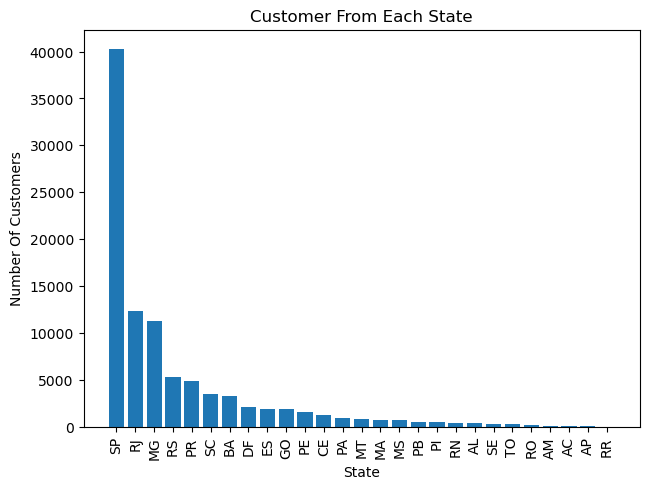

In [16]:
plt.bar(df['State'], df['Number_Customers'])
plt.xticks(rotation = 90)
plt.title('Customer From Each State')
plt.tight_layout()
plt.xlabel("State")
plt.ylabel("Number Of Customers")
plt.show()

# Calculate the number of orders per month in 2018.

In [18]:
query = '''
SELECT MONTH(order_purchase_timestamp) Months_2018, MONTHNAME(order_purchase_timestamp) Month_name,
COUNT(order_id) Number_Of_Orders
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp) , Month_name
ORDER BY Months_2018 ;'''

cursor.execute(query)
data = cursor.fetchall()
data

[(1, 'January', 101766),
 (2, 'February', 94192),
 (3, 'March', 100954),
 (4, 'April', 97146),
 (5, 'May', 96222),
 (6, 'June', 86338),
 (7, 'July', 88088),
 (8, 'August', 91168),
 (9, 'September', 224),
 (10, 'October', 56)]

In [19]:
df = pd.DataFrame(data)
df.drop(df.columns[0], axis= 1, inplace = True)
df


,1,2
0,January,101766
1,February,94192
2,March,100954
3,April,97146
4,May,96222
5,June,86338
6,July,88088
7,August,91168
8,September,224
9,October,56


In [20]:
df.columns = ['Months', 'Number_Orders']
print(df.columns)


Index(['Months', 'Number_Orders'], dtype='object')


In [21]:
df= df.sort_values(by = 'Number_Orders', ascending = False)
df

,Months,Number_Orders
0,January,101766
2,March,100954
3,April,97146
4,May,96222
1,February,94192
7,August,91168
6,July,88088
5,June,86338
8,September,224
9,October,56


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'January'),
  Text(1, 0, 'March'),
  Text(2, 0, 'April'),
  Text(3, 0, 'May'),
  Text(4, 0, 'February'),
  Text(5, 0, 'August'),
  Text(6, 0, 'July'),
  Text(7, 0, 'June'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October')])

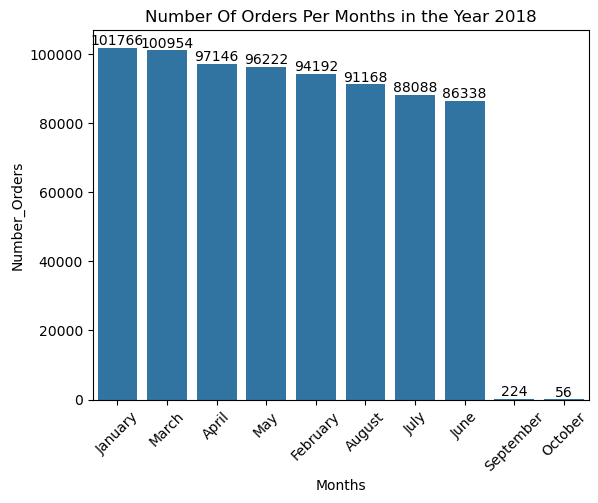

In [22]:
lbl = sns.barplot(x ='Months', y='Number_Orders', data = df)
lbl.bar_label(lbl.containers[0])
plt.title('Number Of Orders Per Months in the Year 2018')
plt.xticks(rotation = 45)


# Find the average number of products per order, grouped by customer city.

In [24]:
query = ''' WITH orders_count AS (
SELECT orders.order_id, orders.customer_id, COUNT(order_items.product_id) AS cProducts
FROM orders 
JOIN order_items
ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id )
SELECT customer_city, AVG(cProducts)
FROM customers 
JOIN orders_count
ON customers.customer_id = orders_count.customer_id
GROUP BY customer_city;'''
cursor.execute(query)
data = cursor.fetchall()
data

[('sao paulo', Decimal('226.6178')),
 ('sao jose dos campos', Decimal('223.1429')),
 ('porto alegre', Decimal('230.2857')),
 ('indaial', Decimal('218.6154')),
 ('treze tilias', Decimal('249.4545')),
 ('rio de janeiro', Decimal('224.7662')),
 ('mario campos', Decimal('261.3333')),
 ('guariba', Decimal('196.0000')),
 ('cuiaba', Decimal('234.7258')),
 ('franca', Decimal('245.3082')),
 ('tocos', Decimal('196.0000')),
 ('januaria', Decimal('231.6364')),
 ('campinas', Decimal('226.8607')),
 ('embu-guacu', Decimal('242.8696')),
 ('cerquilho', Decimal('228.6667')),
 ('belo horizonte', Decimal('224.0815')),
 ('taubate', Decimal('222.4270')),
 ('arcos', Decimal('219.5200')),
 ('monte mor', Decimal('211.0769')),
 ('vianopolis', Decimal('261.3333')),
 ('cacapava', Decimal('227.7838')),
 ('sao jose da tapera', Decimal('196.0000')),
 ('belford roxo', Decimal('213.6577')),
 ('pedro leopoldo', Decimal('245.0000')),
 ('arroio do sal', Decimal('252.0000')),
 ('sao bernardo do campo', Decimal('223.8793')

# Calculate the percentage of total revenue contributed by each product category.

In [26]:
query = '''SELECT 
  product_category,
  SUM(payment_value) * 100.0 / 
    (SELECT SUM(payment_value) FROM payments) AS percentage_value
FROM products 
JOIN order_items  ON products.product_id = order_items.product_id
JOIN payments  ON payments.order_id = order_items.order_id
GROUP BY product_category;'''
cursor.execute(query)
data = cursor.fetchall()
df= pd.DataFrame(data, columns= ['Product_Category','Percentage_Total_Rev'])
df.head()

,Product_Category,Percentage_Total_Rev
0,perfumery,620.410836
1,Furniture Decoration,1750.995140
2,telephony,596.099970
3,bed table bath,2096.715602
4,automotive,1043.481937


# Identify the correlation between product price and the number of times a product has been purchased.

In [8]:
query = '''
SELECT product_category,order_items.product_id, AVG(price), COUNT(order_item_id)
FROM order_items 
JOIN orders 
ON order_items.order_id = orders.order_id 
JOIN products 
ON products.product_id = order_items.product_id
GROUP BY product_category, order_items.product_id;'''
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data , columns = ['Product_category','Product_id','Avg_Price','Order_item'])
df.head(10)
                              

                                    Product_category  \
0                                         housewares   
1                                             babies   
2                                         Cool Stuff   
3                                      HEALTH BEAUTY   
4   Furniture Kitchen Service Area Dinner and Garden   
5                                          perfumery   
6                                     Room Furniture   
7                       Fashion Bags and Accessories   
8                                      HEALTH BEAUTY   
9                                         Cool Stuff   
10                                     sport leisure   
11                                    Games consoles   
12                                         telephony   
13                                              toys   
14                                     sport leisure   
15                                       electronics   
16                                          pet 

In [9]:

arr1 = df['Order_item']
arr2 = df['Avg_Price']
np.corrcoef([arr1,arr2])

array([[ 1.        , -0.03213986],
       [-0.03213986,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [23]:
query1 = '''SELECT seller_id, SUM(payment_value) Total_Revenue, 
RANK() OVER(ORDER BY SUM(payment_value) DESC)
FROM payments
JOIN order_items ON payments.order_id = order_items.order_id
GROUP BY seller_id;'''
cursor1 = conx.cursor()
cursor1.execute(query1)
data = cursor1.fetchall()
df = pd.DataFrame(data, columns = ['Seller_id', 'Total_Revenue', 'Rank'])
df.head()
                  



,Seller_id,Total_Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,1.141126e+08,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,6.934996e+07,2
2,4a3ca9315b744ce9f8e9374361493884,6.778019e+07,3
3,1f50f920176fa81dab994f9023523100,6.530702e+07,4
4,53243585a1d6dc2643021fd1853d8905,6.410319e+07,5


# Calculate the cumulative sales per month for each year.

In [80]:
query2 = '''SELECT years, month, month_name, total_value, SUM(total_value) 
OVER(PARTITION BY years ORDER BY month) AS cumulative_sales
FROM 
(SELECT YEAR(order_purchase_timestamp) years ,MONTH(order_purchase_timestamp) month, MONTHNAME(order_purchase_timestamp) AS month_name,
SUM(payment_value) total_value
FROM orders
JOIN payments 
ON payments.order_id = orders.order_id 
GROUP BY years,month,month_name
)AS monthly_sales'''
cursor.execute(query2)
data = cursor.fetchall()
df = pd.DataFrame( data, columns = ['years','month','month_name','total_value','cumulative_sales'])
df
                                        

,years,month,month_name,total_value,cumulative_sales
0,2016,9,September,5.675400e+04,5.675400e+04
1,2016,10,October,1.329536e+07,1.335211e+07
2,2016,12,December,4.414500e+03,1.335653e+07
3,2017,1,January,3.115981e+07,3.115981e+07
4,2017,2,February,6.567930e+07,9.683911e+07
5,2017,3,March,1.012193e+08,1.980584e+08
6,2017,4,April,9.400231e+07,2.920607e+08
7,2017,5,May,1.334067e+08,4.254675e+08
8,2017,6,June,1.150372e+08,5.405046e+08
9,2017,7,July,1.332862e+08,6.737908e+08


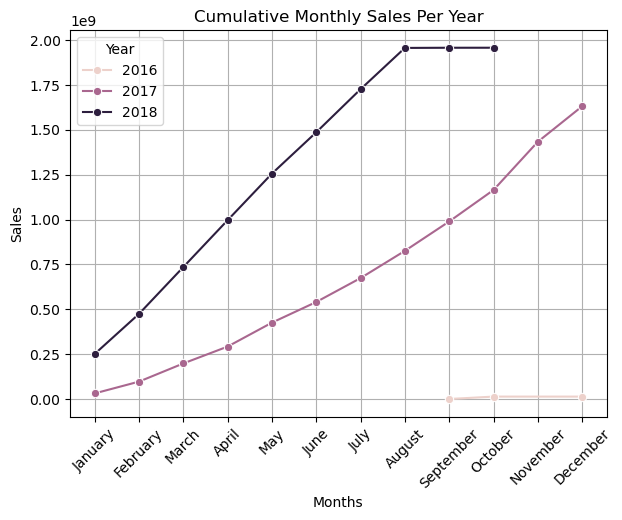

In [88]:
import calendar
month_order = list(calendar.month_name)[1:]
df['month_name'] = pd.Categorical(df['month_name'],
categories = month_order, ordered = True)
sns.lineplot(data = df, x ='month_name', y ='cumulative_sales', hue = 'years', marker = 'o')
plt.title('Cumulative Monthly Sales Per Year')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.tight_layout()
plt.xticks(rotation = 45 )
plt.legend(title ='Year')
plt.grid(True)
plt.show()
                         

# Calculate the year-over-year growth rate of total sales.

In [92]:
query = '''SELECT years, total_sales,
(total_sales - lag(total_sales,1) OVER(ORDER BY years))*100.0/ lag(total_sales,1) OVER(ORDER BY years) AS rate
FROM (
SELECT YEAR(order_purchase_timestamp) years,SUM(payment_value) AS total_sales
FROM orders
JOIN payments
ON orders.order_id = payments.order_id
GROUP BY YEAR(order_purchase_timestamp)
) AS a'''
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns= ['years', 'total_sales', 'YofY growth rate'])
df 

                  


,years,total_sales,YofY growth rate
0,2016,1.335653e+07,NaN
1,2017,1.631193e+09,12112.703760
2,2018,1.957447e+09,20.000924


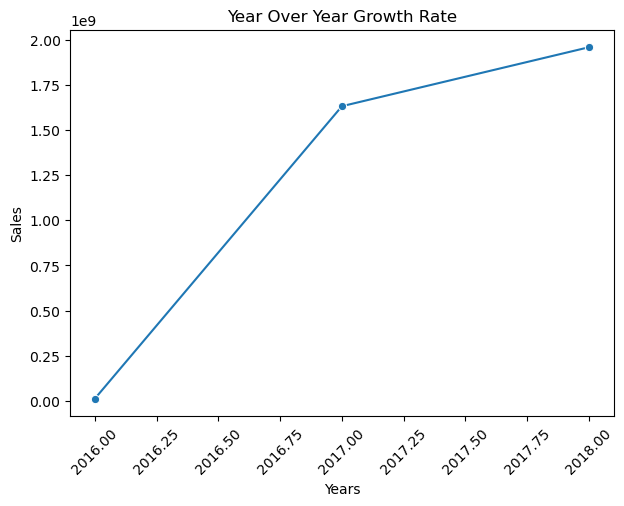

In [100]:
sns.lineplot(data = df, x = 'years', y = 'total_sales', marker = 'o')
plt.title('Year Over Year Growth Rate')
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.show()

# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [ ]:
query = '''WITH first_purchase AS (
 SELECT customer_id, MIN(order_purchase_timestamp) As first_purchase_date
 FROM orders
 GROUP BY customer_id
 ),
 next_purchase AS (
 SELECT o.customer_id , f.first_purchase_date, o.order_purchase_timestamp
 FROM orders o
 JOIN first_purchase f
 ON o.customer_id = f.customer_id
 WHERE o.order_purchase_timestamp > f.first_purchase_date 
 AND o.order_purchase_timestamp <= DATE_ADD(f.first_purchase_date, INTERVAL 6 MONTH)
 ) 
 SELECT COUNT(DISTINCT next_purchase.customer_id )*100 / COUNT(first_purchase.customer_id)
 FROM first_purchase 
 LEFT JOIN next_purchase
 ON next_purchase.customer_id = first_purchase.customer_id;
 '''
cursor.execute(query)
data = cursor.fetchall()
data

#  Identify the top 3 customers who spent the most money in each year.

In [15]:
query = ''' # Identify the top 3 customers who spent the most money in each year.
WITH total_year_spent AS (
 SELECT YEAR(order_purchase_timestamp) years, customer_id, SUM(payment_value) total_spent,
 DENSE_RANK() OVER(PARTITION BY YEAR(order_purchase_timestamp)  ORDER BY SUM(payment_value) DESC) AS d_rank
 FROM orders
 JOIN payments 
 ON orders.order_id = payments.order_id
 GROUP BY customer_id, YEAR(order_purchase_timestamp))
 SELECT years, customer_id, ROUND(total_spent,2)
 FROM total_year_spent 
 WHERE d_rank <=3;'''
cursor.execute(query)
data = cursor.fetchall()
data 
df = pd.DataFrame(data, columns = ['Year','Customer_id','Money_spent'])
df

,Year,Customer_id,Money_spent
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,320298.76
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,315166.50
2,2016,4a06381959b6670756de02e07b83815f,276250.51
3,2017,1617b1357756262bfa56ab541c47bc16,3074418.02
4,2017,c6e2731c5b391845f6800c97401a43a9,1559094.76
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,1513498.54
6,2018,ec5b2ba62e574342386871631fafd3fc,1636847.97
7,2018,f48d464a0baaea338cb25f816991ab1f,1557497.24
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,1082123.99


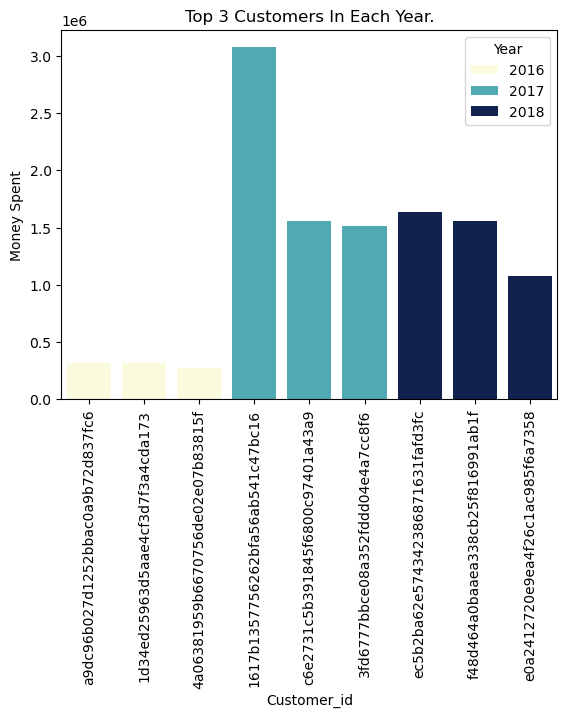

In [21]:
sns.barplot(x = 'Customer_id', y ='Money_spent',data = df, hue = 'Year', palette = 'YlGnBu')
plt.title ('Top 3 Customers In Each Year.')
plt.xlabel ( 'Customer_id')
plt.ylabel ( 'Money Spent')
plt.xticks (rotation = 90)
plt.show()
